## Bank Data Project
To identify wether customer continues with the account or exited.

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().sum()

0

## Seperate X and Y features for train the model
Drop drop statistically significantly columns - id, CustomerId, Surname

In [23]:
X = df.drop(columns=['id', 'CustomerId', 'Surname', 'Exited'])
Y = df[['Exited']]

In [24]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


In [25]:
Y.head()

,Exited
0,0
1,0
2,0
3,0
4,0


## Seperate cat and con features for X

In [26]:
cat = X.columns[X.dtypes=='object']
con = X.columns[X.dtypes!='object']

In [27]:
cat

Index(['Geography', 'Gender'], dtype='object')

In [28]:
con

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

## Create feature selection for mutual info score

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [30]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ordinal', OrdinalEncoder())])

pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [31]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__CreditScore,num__Age,num__Tenure,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,num__EstimatedSalary,cat__Geography,cat__Gender
0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,0.571263,-0.99555,1.369486,0.0,1.0
1,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,0.571263,1.00447,-1.254085,0.0,1.0
2,0.268974,0.211354,1.774548,-0.883163,0.814298,0.571263,-0.99555,1.437422,0.0,1.0
3,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,0.571263,1.00447,-0.557018,0.0,1.0
4,0.743362,-0.578074,-0.007253,-0.883163,0.814298,0.571263,1.00447,-1.938770,2.0,1.0


## Check the mutual info score

In [32]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([0.00235636, 0.08445321, 0.00299803, 0.02146308, 0.10139339,
       0.01301827, 0.03643861, 0.00783441, 0.02470954, 0.03219288])

In [33]:
mi = pd.Series(mi)
mi.index = X_pre.columns
mi = mi.sort_values(ascending=False)
mi

num__NumOfProducts      0.101393
num__Age                0.084453
num__IsActiveMember     0.036439
cat__Gender             0.032193
cat__Geography          0.024710
num__Balance            0.021463
num__HasCrCard          0.013018
num__EstimatedSalary    0.007834
num__Tenure             0.002998
num__CreditScore        0.002356
dtype: float64

<Axes: title={'center': 'Mutual info score'}>

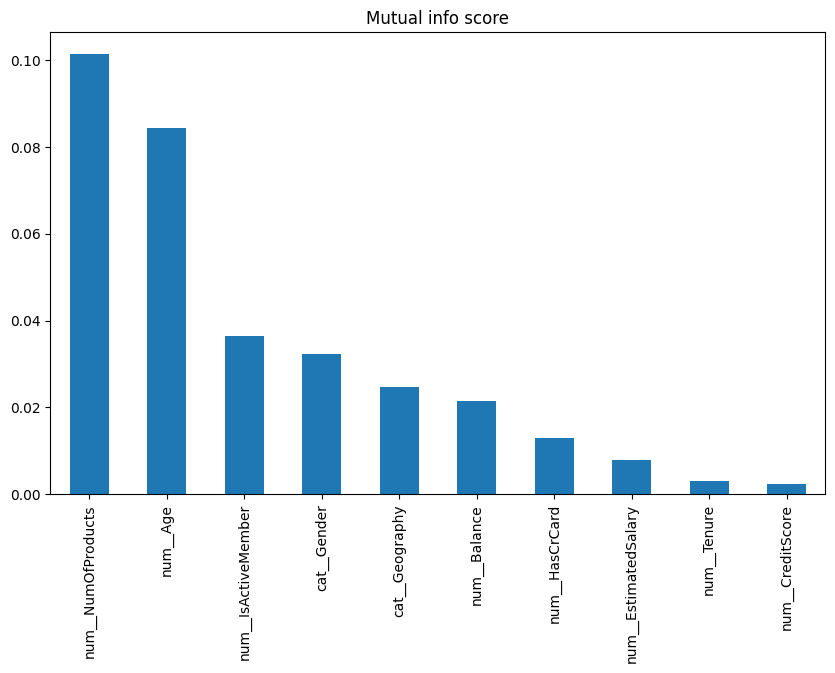

In [34]:
mi.plot(kind='bar', title='Mutual info score', figsize=(10,6))

## Based on above result we conclude "NumOfProducts", "Age", "IsActiveMember", and "Gender" are top 4 contributors

## Create a final pipeline for model trainng
use OneHotEncoder for Categorical features

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)]).set_output(transform='pandas')

In [38]:
X_pre1 = pre1.fit_transform(X)
X_pre1.head()

,num__CreditScore,num__Age,num__Tenure,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,num__EstimatedSalary,cat__Geography_France,cat__Geography_Germany,cat__Geography_Spain,cat__Gender_Female,cat__Gender_Male
0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,0.571263,-0.99555,1.369486,1.0,0.0,0.0,0.0,1.0
1,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,0.571263,1.00447,-1.254085,1.0,0.0,0.0,0.0,1.0
2,0.268974,0.211354,1.774548,-0.883163,0.814298,0.571263,-0.99555,1.437422,1.0,0.0,0.0,0.0,1.0
3,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,0.571263,1.00447,-0.557018,1.0,0.0,0.0,0.0,1.0
4,0.743362,-0.578074,-0.007253,-0.883163,0.814298,0.571263,1.00447,-1.938770,0.0,0.0,1.0,0.0,1.0


## Apply train test split

In [39]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y , test_size=0.2, random_state=41)

In [40]:
xtrain.head()

,num__CreditScore,num__Age,num__Tenure,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,num__EstimatedSalary,cat__Geography,cat__Gender
49465,-0.130511,0.662456,-1.432694,-0.883163,0.814298,0.571263,-0.99555,-1.891629,0.0,0.0
20835,1.267687,0.775231,0.349107,1.247643,-1.013348,-1.750507,-0.99555,0.149758,2.0,1.0
101954,-0.292802,-0.465299,1.061827,-0.883163,-1.013348,0.571263,1.00447,1.019150,0.0,1.0
31058,-1.678517,0.324129,-0.007253,1.411543,0.814298,0.571263,1.00447,-1.944316,0.0,1.0
148168,-0.130511,0.662456,-0.363613,0.930959,2.641943,0.571263,-0.99555,0.718093,1.0,1.0


In [42]:
ytrain.head()

,Exited
49465,0
20835,0
101954,0
31058,0
148168,1


In [43]:
xtest.head()

,num__CreditScore,num__Age,num__Tenure,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,num__EstimatedSalary,cat__Geography,cat__Gender
77006,0.730878,-0.803625,-1.076334,-0.883163,0.814298,0.571263,1.00447,0.609026,0.0,0.0
32268,-0.005672,-1.029176,0.349107,1.313113,-1.013348,0.571263,-0.99555,-0.957019,2.0,1.0
117133,-1.391387,1.902986,-1.432694,1.244854,-1.013348,-1.750507,1.00447,-1.898472,2.0,0.0
157989,-0.392674,-0.578074,1.061827,-0.883163,-1.013348,0.571263,1.00447,0.901879,0.0,1.0
129796,0.643491,0.098578,1.418187,-0.883163,0.814298,0.571263,1.00447,0.605560,2.0,1.0


In [44]:
ytest.head()

,Exited
77006,1
32268,0
117133,1
157989,0
129796,0


In [45]:
xtrain.shape

(132027, 10)

In [47]:
ytrain.shape

(132027, 1)

## Aglorithm Evaluation

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [49]:
dct = {'logistic': LogisticRegression(),
       'decision': DecisionTreeClassifier(),
       'random_forest': RandomForestClassifier(),
       'gradient': GradientBoostingClassifier()}

In [51]:
dct.values()

dict_values([LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier()])

In [52]:
dct.keys()

dict_keys(['logistic', 'decision', 'random_forest', 'gradient'])

 ## Fit the model and evaluate based on f1 score

In [53]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [55]:
tr = []
ts = []
tr_cv = []

for name, model in dct.items():
     # Fit the model
    model.fit(xtrain, ytrain)
    # Predict results for train and test
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Calculate f1 score in train and test
    f1_tr = f1_score(ytrain, ypred_tr)
    f1_ts = f1_score(ytest, ypred_ts)
    # 5 - fold cross validation on training
    score = cross_val_score(model, xtrain, ytrain , cv=5, scoring='f1_macro')
    f1_cv = score.mean()
    # Append above results in tr, ts, tr_cv
    tr.append(f1_tr)
    ts.append(f1_ts)
    tr_cv.append(f1_cv)

    #print above results
    print(f'Model name : {name}\n')
    print(f'Train F1 : {f1_tr:.4f}')
    print(f'Train F1 Cross Validated : {f1_cv:.4f}')
    print(f'Test F1 : {f1_ts:.4f}')
    print('\n=========================================================================\n')

Model name : logistic

Train F1 : 0.4557
Train F1 Cross Validated : 0.6758
Test F1 : 0.4583


Model name : decision

Train F1 : 0.9993
Train F1 Cross Validated : 0.6993
Test F1 : 0.5401


Model name : random_forest

Train F1 : 0.9992
Train F1 Cross Validated : 0.7654
Test F1 : 0.6141


Model name : gradient

Train F1 : 0.6247
Train F1 Cross Validated : 0.7691
Test F1 : 0.6281




In [56]:
tr

[0.45570338161968, 0.9993036833366066, 0.9991789819376027, 0.6246890352252534]

In [57]:
ts

[0.458257626470307, 0.5401137980085348, 0.6141380735841256, 0.6281075596144089]

In [58]:
tr_cv

[0.6757990276569958, 0.6993180176617784, 0.765404591961247, 0.7691006762736405]

In [59]:
result_dct = {'Model': list(dct.keys()),
              'Train_f1': tr,
              'Test_f1': ts,
              'Train_cv': tr_cv}

In [60]:
result_dct = pd.DataFrame(result_dct)
result_dct

,Model,Train_f1,Test_f1,Train_cv
0,logistic,0.455703,0.458258,0.675799
1,decision,0.999304,0.540114,0.699318
2,random_forest,0.999179,0.614138,0.765405
3,gradient,0.624689,0.628108,0.769101


In [63]:
result_dct.sort_values('Test_f1', ascending=False)

,Model,Train_f1,Test_f1,Train_cv
3,gradient,0.624689,0.628108,0.769101
2,random_forest,0.999179,0.614138,0.765405
1,decision,0.999304,0.540114,0.699318
0,logistic,0.455703,0.458258,0.675799


## Based on above result we choosed the GradientBoostingClassification for further steps

In [66]:
model1 = GradientBoostingClassifier(learning_rate=0.001, n_estimators=2, max_depth=4, min_samples_leaf=5, min_samples_split=3)
model1.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.001, max_depth=4, min_samples_leaf=5,
                           min_samples_split=3, n_estimators=2)

In [67]:
model1.score(xtrain, ytrain)

0.7877403864361078

In [68]:
model1.score(xtest, ytest)

0.7910443239312873

## Hyperparameter tunning with randomise search cv

In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
params = {'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5],
          'max_depth':[2,3,4,5,6,7],
          'n_estimators':[10,50,100,150,200],
          'min_samples_split':[2,3,4,5,6,7]}

In [71]:
gbc = GradientBoostingClassifier()
rdcv = RandomizedSearchCV(gbc, param_distributions=params, cv=5, scoring='f1_macro')
rdcv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [10, 50, 100, 150,
                                                         200]},
                   scoring='f1_macro')

In [72]:
rdcv.best_score_

0.7767337021514615

In [73]:
rdcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'max_depth': 6,
 'learning_rate': 0.1}

In [98]:
best_model = rdcv.best_estimator_

In [99]:
best_model

GradientBoostingClassifier(max_depth=6)

In [100]:
best_model.score(xtrain, ytrain)

0.8720488990888228

In [101]:
best_model.score(xtest, ytest)

0.8675129517981034

## Predict the test result

In [102]:
ypred_tr = best_model.predict(xtrain)
ypred_ts = best_model.predict(xtest)

In [103]:
ypred_tr[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [104]:
ytrain.head()

,Exited
49465,0
20835,0
101954,0
31058,0
148168,1


In [105]:
ypred_ts[0:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [106]:
ytest.head()

,Exited
77006,1
32268,0
117133,1
157989,0
129796,0


In [107]:
c = best_model.classes_
c

array([0, 1], dtype=int64)

## Check the confusion metrics

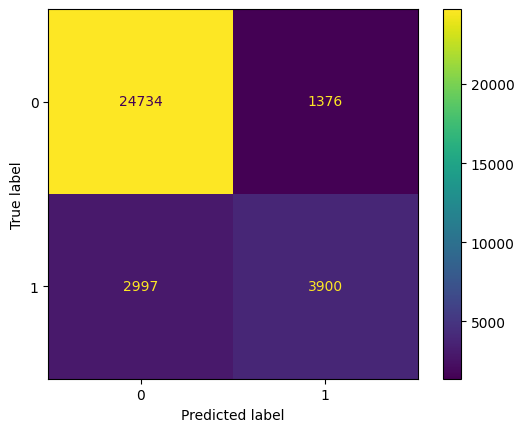

In [108]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=c)
cfd.plot()

## Check Classification report

In [109]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26110
           1       0.74      0.57      0.64      6897

    accuracy                           0.87     33007
   macro avg       0.82      0.76      0.78     33007
weighted avg       0.86      0.87      0.86     33007



## Predict the out of sample data

In [110]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [111]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [112]:
xnew.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [113]:
xnew.duplicated().sum()

0

In [120]:
Xnew_pre = pre1.transform(xnew)
Xnew_pre.head()

,num__CreditScore,num__Age,num__Tenure,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,num__EstimatedSalary,cat__Geography_France,cat__Geography_Germany,cat__Geography_Spain,cat__Gender_Female,cat__Gender_Male
0,-0.879546,-1.705829,-1.076334,-0.883163,0.814298,-1.750507,1.00447,0.962404,1.0,0.0,0.0,1.0,0.0
1,0.331393,0.888007,-1.076334,-0.883163,-1.013348,0.571263,-0.99555,-0.795852,1.0,0.0,0.0,1.0,0.0
2,-0.005672,-0.465299,0.705467,-0.883163,0.814298,0.571263,-0.99555,0.523083,1.0,0.0,0.0,1.0,0.0
3,0.306425,-0.239748,1.061827,-0.883163,-1.013348,0.571263,-0.99555,0.026977,1.0,0.0,0.0,0.0,1.0
4,1.192783,-0.014197,1.774548,1.047249,-1.013348,0.571263,-0.99555,0.533997,0.0,1.0,0.0,0.0,1.0


In [122]:
Xnew_pre.columns

Index(['num__CreditScore', 'num__Age', 'num__Tenure', 'num__Balance',
       'num__NumOfProducts', 'num__HasCrCard', 'num__IsActiveMember',
       'num__EstimatedSalary', 'cat__Geography_France',
       'cat__Geography_Germany', 'cat__Geography_Spain', 'cat__Gender_Female',
       'cat__Gender_Male'],
      dtype='object')

In [124]:
pred = best_model.predict(Xnew_pre)
pred

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- cat__Gender_Female
- cat__Gender_Male
- cat__Geography_France
- cat__Geography_Germany
- cat__Geography_Spain
Feature names seen at fit time, yet now missing:
- cat__Gender
- cat__Geography
